**Problem 1: Binomial Simulation of Card Drawing**
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import seaborn as sns

In [5]:
n_trials = 100
p_red = 0.5

# binomial distribution
red_drawn = rnd.binomial(n = 1, p = p_red, size = n_trials)

# number of times red card is drawn
num_red_drawn = np.sum(red_drawn)

empirical_proability = num_red_drawn / n_trials

print(f"The empirical probability of drawing a red card is: {empirical_proability}.")


The empirical probability of drawing a red card is: 0.52.


**The empirical probability is very close to the assumed theoretical probability of 0.5.**

**Problem 2: Binomial vs. Gaussian Approximation**
---

The mean of the simulated distribution is: 50.11.
The standard deviation of the simulated distribution is: 4.98.
The mean from the Gaussian approximation is: 50.00.
The standard deviation from the Gaussian approximation is: 5.00.


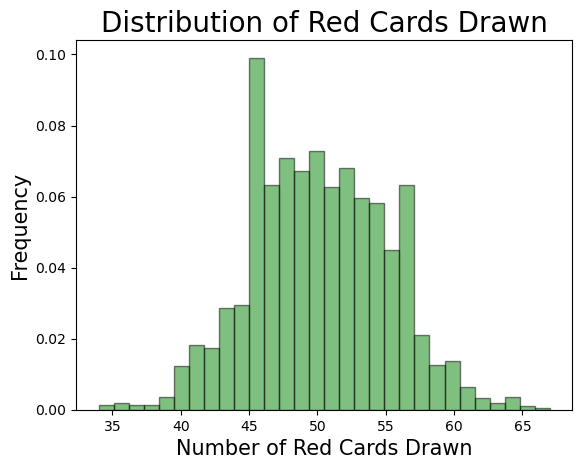

In [7]:
rnd.seed(42) 
n_trials = 100
n_experiments = 2000
p_red = 0.5
n_red = np.zeros(n_experiments)
title_size = 20
label_size = 15

# storing the number of red cards each time
for i in range (n_experiments):
    red_drawn = rnd.binomial(n = n_trials, p = p_red, size = 1)
    num_red_drawn = np.sum(red_drawn)
    n_red[i] = num_red_drawn
    
# Plot the distribution of red cards drawn
plt.hist(n_red, bins = 30, 
         density = True, 
         color = 'green', 
         edgecolor = 'black',
         alpha = 0.5)
plt.xlabel('Number of Red Cards Drawn', fontsize = label_size)
plt.ylabel('Frequency', fontsize = label_size)
plt.title('Distribution of Red Cards Drawn', fontsize = title_size)


# mean and standard deviation of the simulated distribution
mean_red = np.mean(n_red)
sd_red = np.std(n_red)

print(f"The mean of the simulated distribution is: {mean_red:.2f}.")
print(f"The standard deviation of the simulated distribution is: {sd_red:.2f}.")


# mean and sd from the Gaussian approximation formula (n = sample size, p = probability of red card)
mean_Gaussian = n_trials * p_red
sd_Gaussian = np.sqrt(n_trials * p_red * (1 - p_red))

print(f"The mean from the Gaussian approximation is: {mean_Gaussian:.2f}.")
print(f"The standard deviation from the Gaussian approximation is: {sd_Gaussian:.2f}.")

**The mean and standard deviation from the simulated distribution is very close to the mean and standard deviation calculated from the Gaussian approxmiation formula.**

**Problem 3: Simulating an Election in a Fictional Country**
---

In [8]:
# Setting up the parameters for the simulation
states_population = np.array([8000, 12000, 3000, 5000])  # num of voters in each state
turnout_percentages = np.array([0.6, 0.75, 0.5, 0.52])   # turnout rate in each state
p_votes_A = np.array([0.45, 0.5, 0.4, 0.52])             # probability of voting candidate A in each state
n_simulations = 2000                                     # Number of simulations to run

# Array to store results
votes_results_A = np.zeros(n_simulations)
votes_results_B = np.zeros(n_simulations)

#original outcome
original_total_votes_A = np.sum(states_population * turnout_percentages * p_votes_A)
original_total_votes_B = np.sum(states_population * turnout_percentages * (1 - p_votes_A))

# simulation
for i in range(n_simulations):
    total_votes_A = 0
    total_votes_B = 0
    
    for voters_count, turnout, p_votes_A_vals in zip(states_population, turnout_percentages, p_votes_A):
        voters_turned_out = int(voters_count * turnout)
        votes_A = np.random.binomial(voters_turned_out, p_votes_A_vals)
        votes_B = voters_turned_out - votes_A
        total_votes_A += votes_A
        total_votes_B += votes_B
        
    votes_results_A[i] = total_votes_A
    votes_results_B[i] = total_votes_B


# determine the winner
total_votes_A_mean = np.mean(votes_results_A)
total_votes_B_mean = np.mean(votes_results_B)

if total_votes_A_mean > total_votes_B_mean:
    print("Candidate A won!")

elif total_votes_A_mean < total_votes_B_mean:
    print("Candidiate B won!")
else:
    print("Ties.")

Candidiate B won!


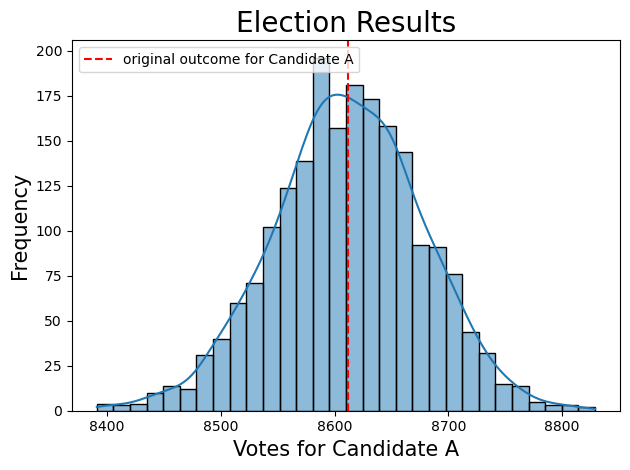

In [13]:
# plotting the results

plt.subplot(1, 1, 1)
sns.histplot(votes_results_A, kde=True, bins=30)
plt.title('Election Results', fontsize = 20)
plt.xlabel('Votes for Candidate A', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.axvline(x=original_total_votes_A, color='r', linestyle='--', label = 'original outcome for Candidate A')
plt.legend(loc = 'upper left')
plt.tight_layout()

**Problem 4: Effects of Sample Size on the Distribution of Sums**
---

In [ ]:
# code from tutorial that I rewrote

n_dice = 2
n_trials = 2000
dice_sum = np.zeros(n_trials)

# Simulate rolling the dice
for i in range(n_trials) :
    dice_rolls = np.random.randint(1, 7, size=n_dice)
    # Sum the rolls
    dice_sum[i] = np.sum(dice_rolls)  

In [ ]:
# Function for counting sums of dice rolls

def roll_dice(num_dice, num_rolls):
    dice_sums = np.zeros(num_rolls)
    
    for i in range(num_rolls):
        dice_roll = np.random.randint(1, 7, size = num_dice)
        dice_sums[i] = np.sum(dice_roll)
        
    return dice_sums

# setting up the experiment
n_experiments = 5000
dice_numbers = np.array([2, 4, 8, 16, 32])
results_array = np.zeros((len(dice_numbers), n_experiments))

# run the experiments
for i in range(len(dice_numbers)):
    results_array[i,:] = roll_dice(dice_numbers[i], n_experiments)

# plotting the results
plt.figure(figsize = (10,6))
for i in range(len(dice_numbers)):
    sns.kdeplot(results_array[i, :], label=f'{dice_numbers[i]} dice', alpha=0.25, fill=True)

font_size = 20
plt.xlabel('Dice Sum', fontsize = font_size)
plt.ylabel('Density', fontsize = font_size)
plt.title('Overlaid KDEs for Different Numbers of Dice', fontsize = font_size)
plt.legend(fontsize = 'large')

**Briefly describe how the sampling distributions change as the number of dice increases.**

As the number of dice increases, the sampling distribution becomes flatter and more spread out. The sampling distribution also shifts right as the number of dice increases.